In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/celebal internship/air quality index/one_month_mumbai.csv')
df.head()

Mounted at /content/drive


,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,25,100.0,2023-07-03:18,12.0,30.0,19.0,6.0,47.0,2023-07-03T23:30:00,2023-07-03T18:00:00,1688407200
1,29,103.0,2023-07-03:17,12.7,31.3,19.0,7.0,47.3,2023-07-03T22:30:00,2023-07-03T17:00:00,1688403600
2,37,106.0,2023-07-03:16,13.3,32.7,19.0,9.0,47.7,2023-07-03T21:30:00,2023-07-03T16:00:00,1688400000
3,50,109.0,2023-07-03:15,14.0,34.0,19.0,12.0,48.0,2023-07-03T20:30:00,2023-07-03T15:00:00,1688396400
4,50,102.7,2023-07-03:14,11.7,39.7,18.7,12.0,44.0,2023-07-03T19:30:00,2023-07-03T14:00:00,1688392800


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

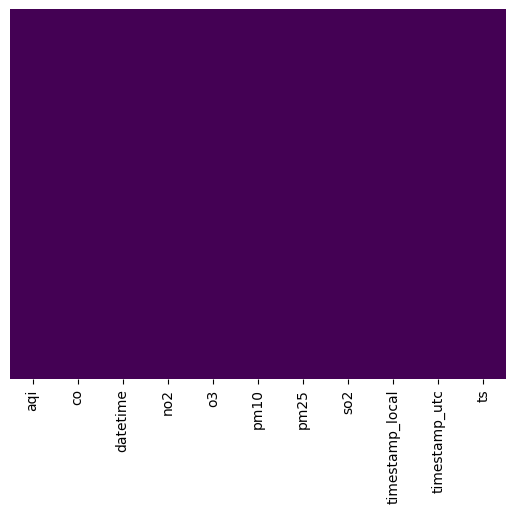

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aqi              721 non-null    int64  
 1   co               721 non-null    float64
 2   datetime         721 non-null    object 
 3   no2              721 non-null    float64
 4   o3               721 non-null    float64
 5   pm10             721 non-null    float64
 6   pm25             721 non-null    float64
 7   so2              721 non-null    float64
 8   timestamp_local  721 non-null    object 
 9   timestamp_utc    721 non-null    object 
 10  ts               721 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 62.1+ KB


In [7]:
y=df.iloc[:,0] ## dependent features
y

0      25
1      29
2      37
3      50
4      50
       ..
716    24
717    23
718    23
719    24
720    54
Name: aqi, Length: 721, dtype: int64

In [8]:
df.columns

Index(['aqi', 'co', 'datetime', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'timestamp_local', 'timestamp_utc', 'ts'],
      dtype='object')

In [9]:
X=df[['co', 'datetime', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'timestamp_local', 'timestamp_utc', 'ts']] ## independent features

In [10]:
X

,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,100.0,2023-07-03:18,12.0,30.0,19.0,6.0,47.0,2023-07-03T23:30:00,2023-07-03T18:00:00,1688407200
1,103.0,2023-07-03:17,12.7,31.3,19.0,7.0,47.3,2023-07-03T22:30:00,2023-07-03T17:00:00,1688403600
2,106.0,2023-07-03:16,13.3,32.7,19.0,9.0,47.7,2023-07-03T21:30:00,2023-07-03T16:00:00,1688400000
3,109.0,2023-07-03:15,14.0,34.0,19.0,12.0,48.0,2023-07-03T20:30:00,2023-07-03T15:00:00,1688396400
4,102.7,2023-07-03:14,11.7,39.7,18.7,12.0,44.0,2023-07-03T19:30:00,2023-07-03T14:00:00,1688392800
...,...,...,...,...,...,...,...,...,...,...
716,159.0,2023-06-03:22,24.7,13.3,25.7,2.0,118.7,2023-06-04T03:30:00,2023-06-03T22:00:00,1685829600
717,157.0,2023-06-03:21,25.0,15.0,25.0,2.0,121.0,2023-06-04T02:30:00,2023-06-03T21:00:00,1685826000
718,161.3,2023-06-03:20,26.7,17.7,24.7,1.0,123.0,2023-06-04T01:30:00,2023-06-03T20:00:00,1685822400
719,165.7,2023-06-03:19,28.3,20.3,24.3,1.0,125.0,2023-06-04T00:30:00,2023-06-03T19:00:00,1685818800


In [11]:
X.isnull()

,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
716,False,False,False,False,False,False,False,False,False,False
717,False,False,False,False,False,False,False,False,False,False
718,False,False,False,False,False,False,False,False,False,False
719,False,False,False,False,False,False,False,False,False,False


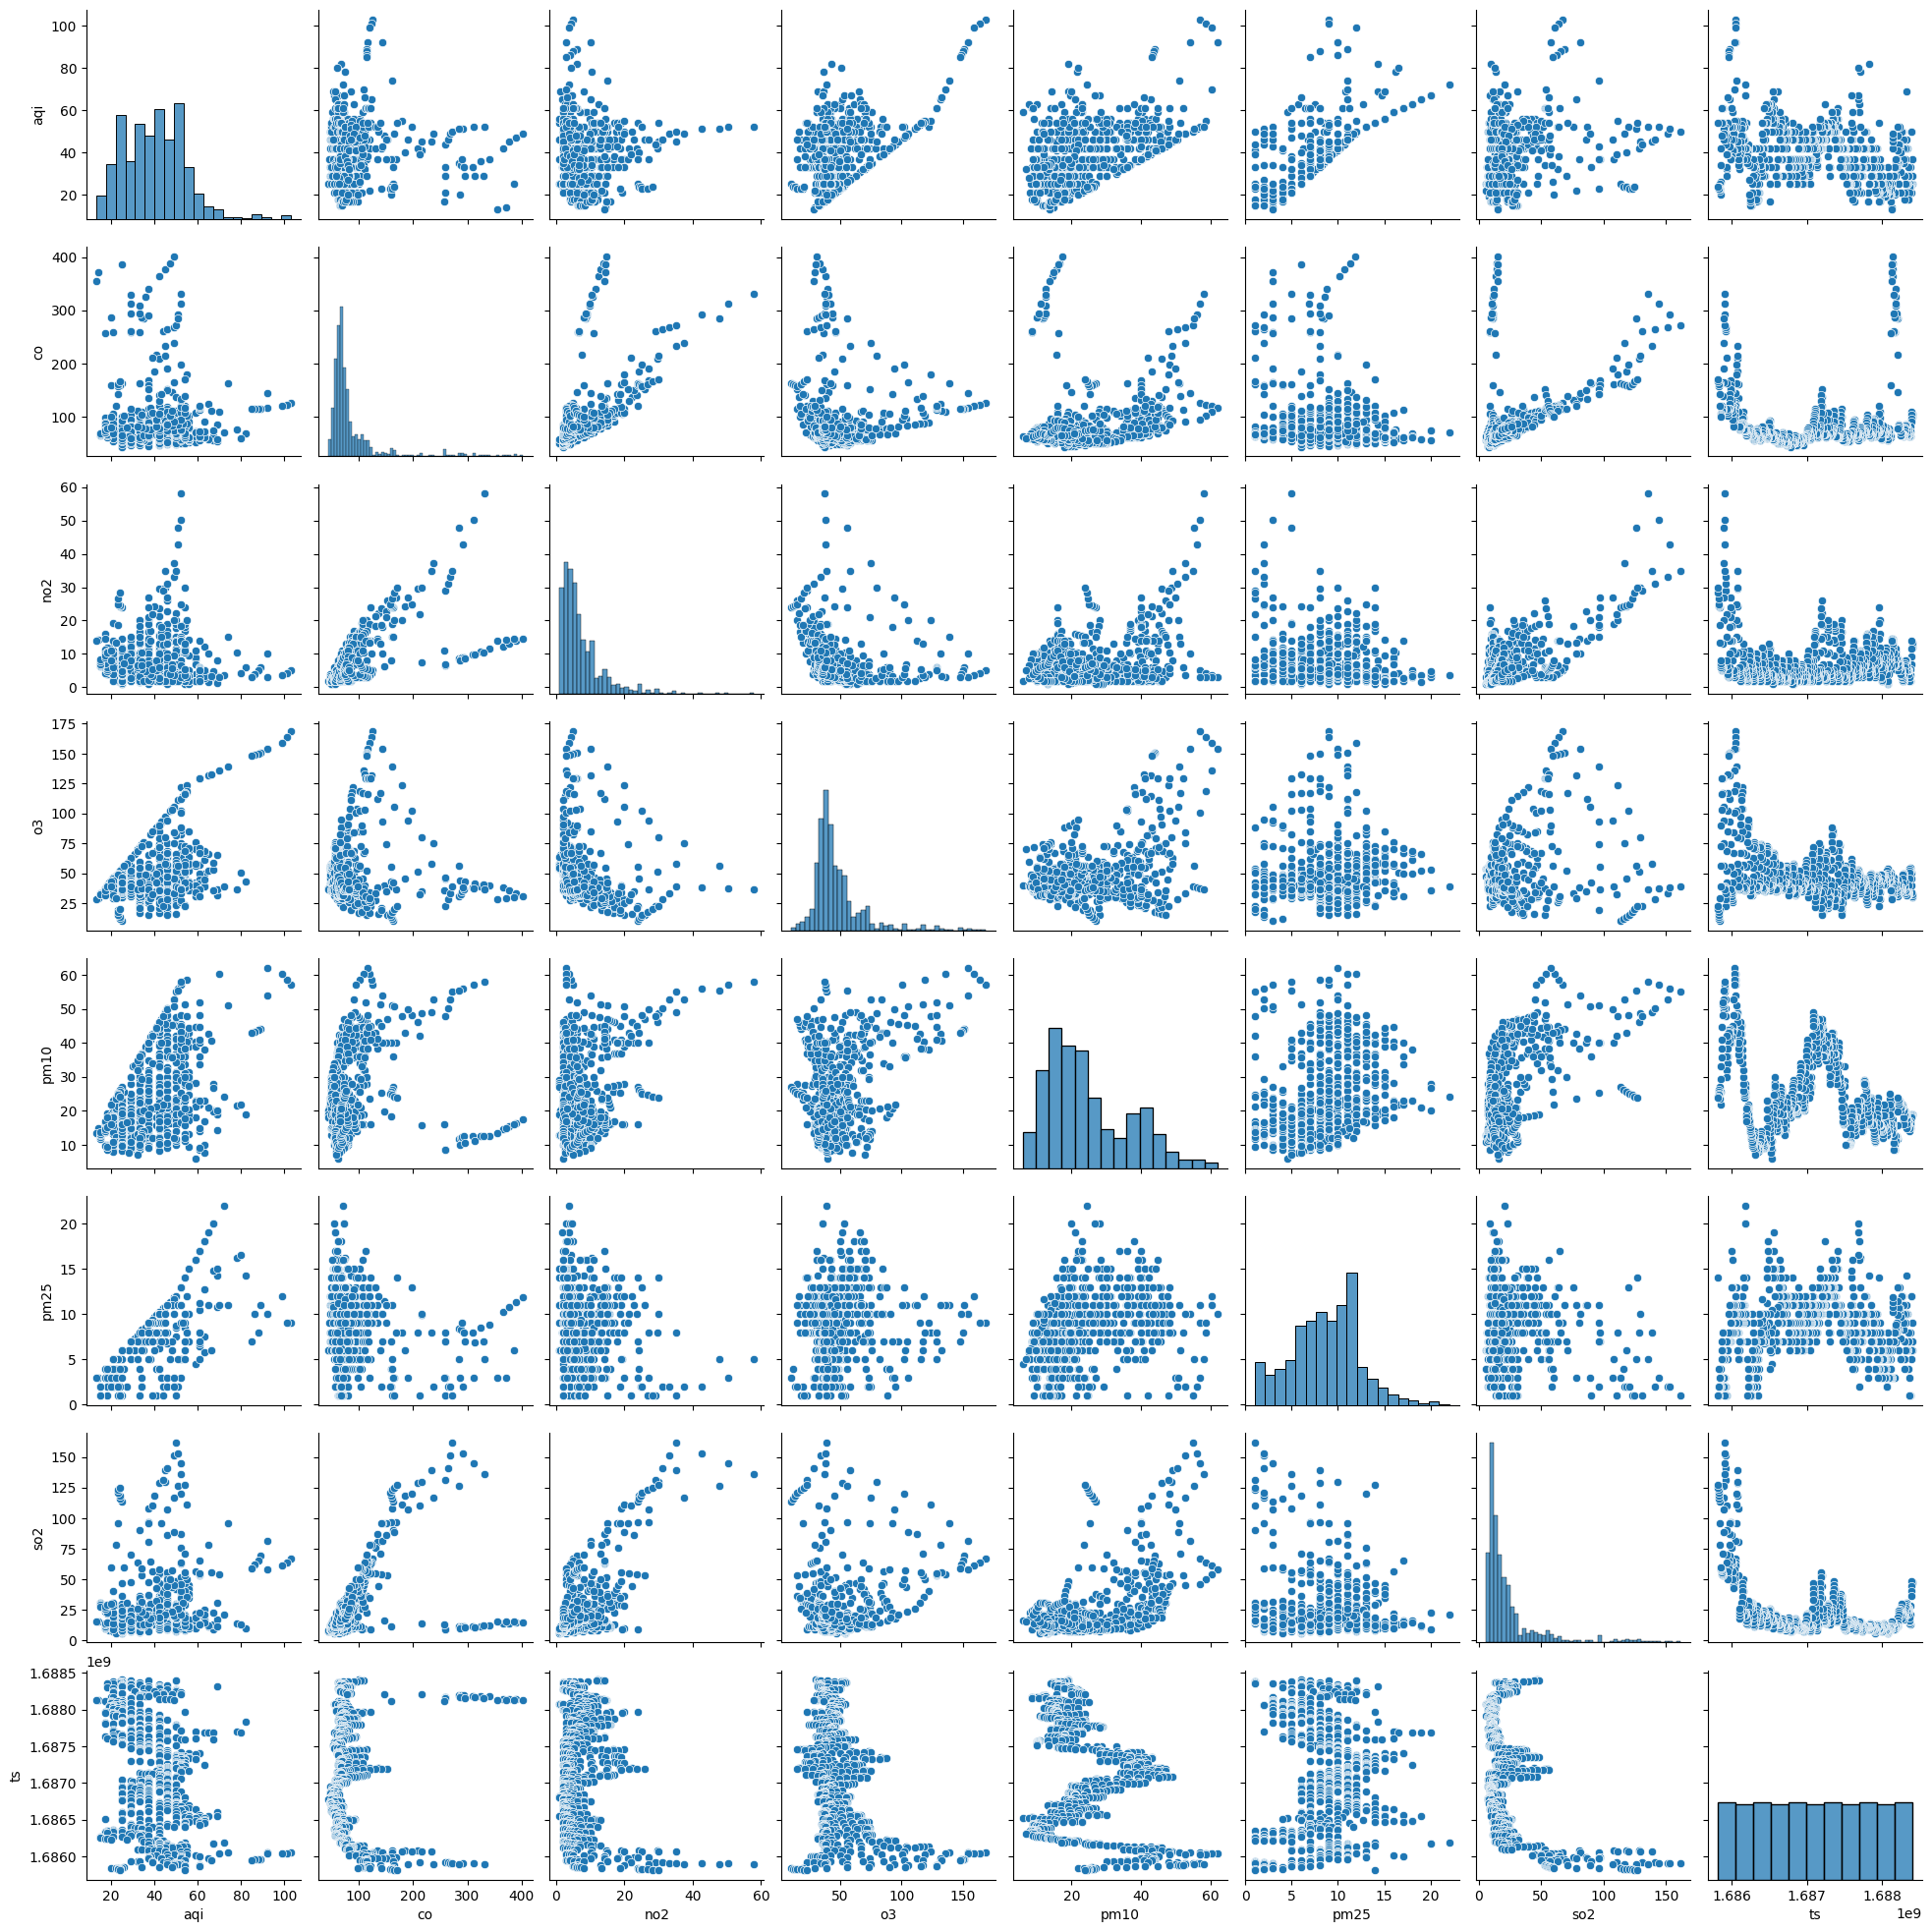

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,aqi,co,no2,o3,pm10,pm25,so2,ts
aqi,1.000000,0.023254,-0.029133,0.492450,0.512878,0.735334,0.214750,-0.321628
co,0.023254,1.000000,0.626208,-0.000967,0.194348,-0.167267,0.499724,0.002801
no2,-0.029133,0.626208,1.000000,-0.232537,0.323565,-0.195218,0.734319,-0.141331
o3,0.492450,-0.000967,-0.232537,1.000000,0.416319,0.085000,0.218808,-0.374346
pm10,0.512878,0.194348,0.323565,0.416319,1.000000,0.280058,0.556330,-0.360066
pm25,0.735334,-0.167267,-0.195218,0.085000,0.280058,1.000000,-0.160827,-0.024692
so2,0.214750,0.499724,0.734319,0.218808,0.556330,-0.160827,1.000000,-0.490870
ts,-0.321628,0.002801,-0.141331,-0.374346,-0.360066,-0.024692,-0.490870,1.000000


<ipython-input-14-eb5df078eb6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


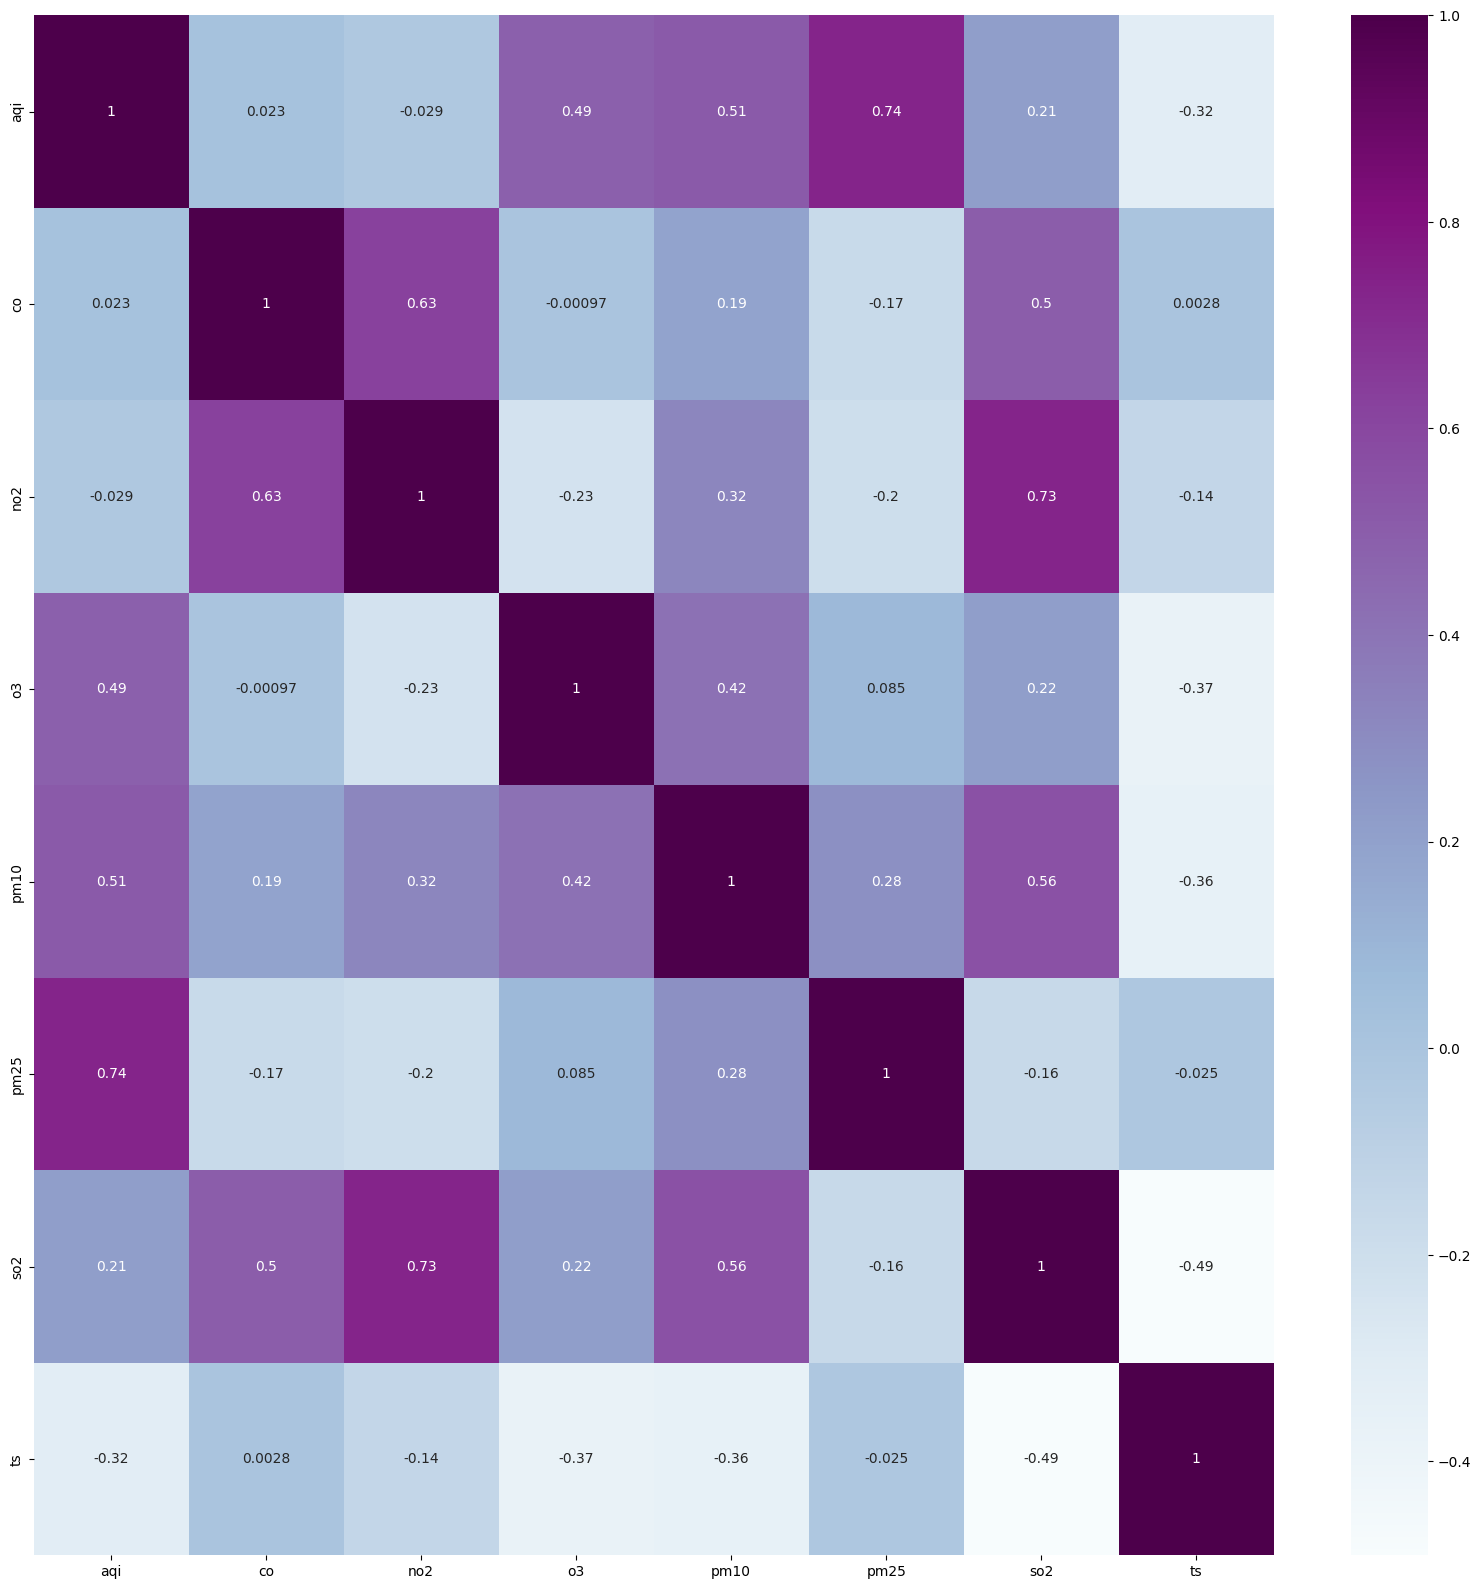

In [14]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="BuPu")

In [15]:
corrmat.index

Index(['aqi', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'ts'], dtype='object')

In [16]:
X = X.drop(['datetime'],axis=1)
X = X.drop(['timestamp_local'],axis=1)
X = X.drop(['timestamp_utc'],axis=1)
X.head()

,co,no2,o3,pm10,pm25,so2,ts
0,100.0,12.0,30.0,19.0,6.0,47.0,1688407200
1,103.0,12.7,31.3,19.0,7.0,47.3,1688403600
2,106.0,13.3,32.7,19.0,9.0,47.7,1688400000
3,109.0,14.0,34.0,19.0,12.0,48.0,1688396400
4,102.7,11.7,39.7,18.7,12.0,44.0,1688392800


In [17]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

[0.0109815  0.01497282 0.23223503 0.09743302 0.57644874 0.01640723
 0.05152167]


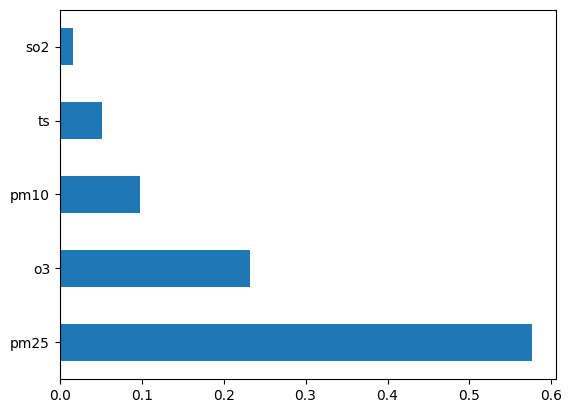

In [18]:
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
import xgboost as xgb
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [20]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
score.mean()

Coefficient of determination R^2 <-- on train set: 0.9999900332867341
Coefficient of determination R^2 <-- on train set: 0.8223439285420747


0.691751869032315

<ipython-input-21-b2472d395ee6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='aqi', ylabel='Density'>

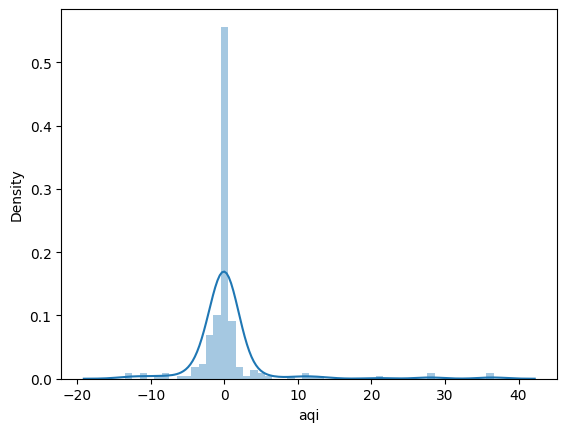

In [21]:
prediction=regressor.predict(X_test)
sns.distplot(y_test-prediction)

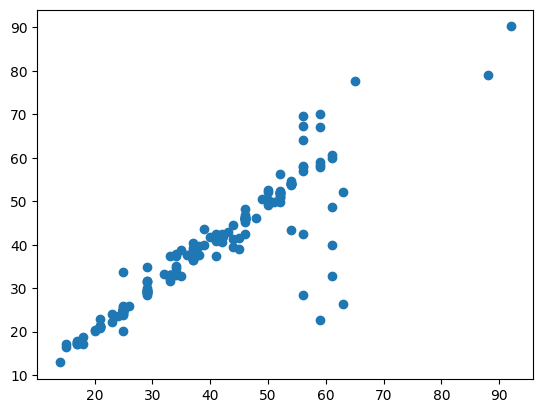

In [22]:
plt.scatter(y_test,prediction)

In [23]:
xgb.XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [24]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
subsample=[0.7,0.6,0.8]

min_child_weight=[3,4,5,6,7]

In [25]:
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [26]:
regressor=xgb.XGBRegressor()

In [27]:
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [28]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   4.6s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   1.6s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time=   0.5s
[CV] END learnin

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=20, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [29]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.2'}

In [30]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.2'}

<ipython-input-31-b8339c71da9d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='aqi', ylabel='Density'>

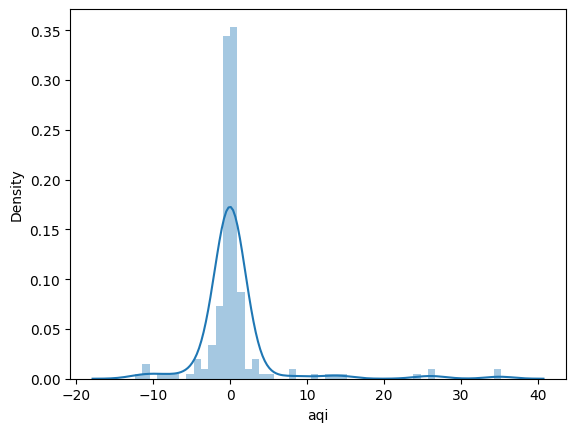

In [31]:
xg_random.best_score_


predictions=xg_random.predict(X_test)
sns.distplot(y_test-predictions)

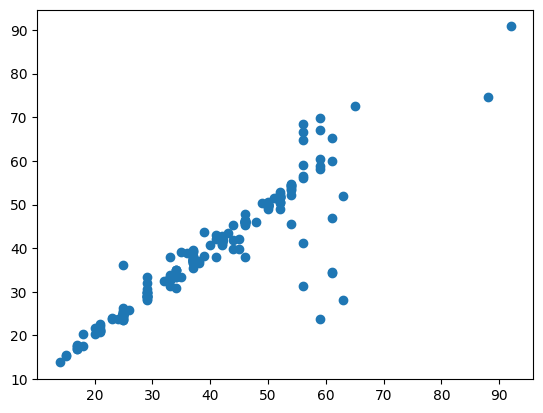

In [32]:
plt.scatter(y_test,predictions)

In [33]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.0456198635189216
MSE: 29.301218498084374
RMSE: 5.413059993948374
